# Excerise 4
In this exercise you will get some hands on experience with applying SVM and Random Forests algorithms for classification problems. For understanding a bit better the theoretical part of SVM, you will practice a concrete example of using a kernel to get a linear separability in a higher dimension. You will then apply a Decision Tree classsifier and random forest on the MNIST hand written digits dataset that we already saw.

As a bonus you are invited to look at an interesting (and relatively easy to play with due to small size data files) Kaggle competition --- "welcome to the real world" ;)

## SVM with a polynomial kernel

You are given data $x=(x_1,x_2)\in\mathbb{R}^2$ that is known to be labeled using the function
$$
y = \text{sign}(3x_1^2 - x_2 - 2)
$$


### Question 1
Use the polynomial transformation into a higher dimensional space, with a polynomial degree 2, and write down a separating hyperplane **in that higher dimension** such that all the samples will be classified correctly. That is, find $w$ and $b$ such that
$$
\forall(x,y):\,\,\,\text{sign}(w^T\phi(x)+b)=y
$$
where 
$$
\phi(x)=\phi(x_1,x_2)=(1, x_1^2, x_2^2, \sqrt{2}x_1, \sqrt{2}x_2, \sqrt{2}x_1x_2)
$$


### Answer 1
Write your answer here...

### Question 2
Using the result above, we know there is a linear separating hyperplane in the 2-degree polynomial higher dimension space. That means we should be able to use SVM with a polynomial kernel of degree 2 to perfectly separate the classes.

- Apply such SVM on the 4 points sample set provided below (make sure to set `coef0=1`)
- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space.
- Compare the results with the true function that generates that data.
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above. Did your results change? What about 500 samples?
- How does the number of support vectors relative to the sample set size changes as you increase the sample set size? What does it mean?
- Write your conclusions.

In [1]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
 
 
sns.set(rc={"figure.figsize": (5,5)})
sns.set_style("white")


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def true_boundary(x1, x2):
  return 3*x1**2 - x2 - 2

def generate_data(m, seed=None):
  # if seed is not None, this function will always generate the same data
  np.random.seed(seed)
  X1 = np.random.uniform(low=-2.0, high=2.0, size=(m,1))
  X2 = np.random.uniform(low=-3.0, high=9.0, size=(m,1))
  X = np.hstack((X1, X2))
  y = np.sign(true_boundary(X[:,0], X[:,1]))
  y[y==0] = 1  
  return X, y

def plot_labeled_data(X, y):
  plt.scatter(X[(y==1),0], X[(y==1),1], c='r')
  plt.scatter(X[(y==-1),0], X[(y==-1),1], c='b')  
  plt.xlim([-2, 2]);
  plt.ylim([-3, 9]);
  plt.plot(np.linspace(-2,2,100), true_boundary(np.linspace(-2,2,100), np.zeros(100)), linewidth=2, c='k');


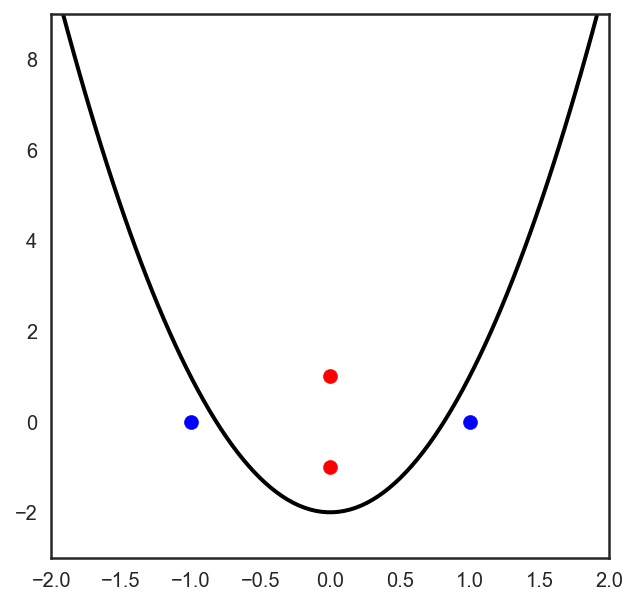

In [3]:
# the sample set
X = np.array([[-1,  0],
              [ 1,  0],
              [ 0, -1],
              [ 0,  1]])

y = np.array([-1,
              -1,
               1,
               1])

plot_labeled_data(X, y)
plt.show()

### Answer 2
- Apply such SVM on the 4 points sample set provided below (make sure to set coef0=1)
- Draw the resulting separarting hyperplane and show the support vectors in the original 2D space.
- Compare the results with the true function that generates that data.
- Create a new training data set with 100 samples (use the provided function) and repeat the steps above. Did your results change? What about 500 samples?
- How does the number of support vectors relative to the sample set size changes as you increase the sample set size? What does it mean?
Write your conclusions.


SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


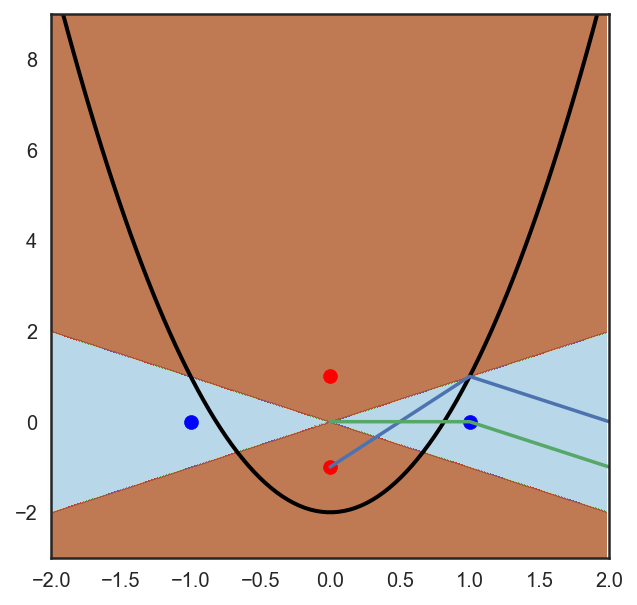

In [4]:
# code and answer go here
from sklearn.svm import SVC
clf = SVC(C = 1, degree = 2)
print clf.fit(X,y)
Z = clf.predict(X)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

h = .02  # step size in the mesh

# create grid to evaluate model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 1+8
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plot_labeled_data(X, y)
plt.plot(clf.support_vectors_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


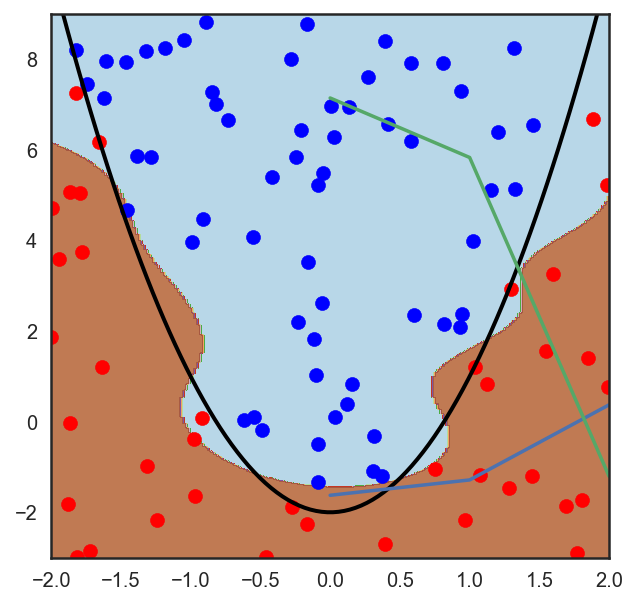

In [5]:
# code and answer go here
X, y = generate_data(100)
from sklearn.svm import SVC
clf = SVC(C = 1, degree = 2)
print clf.fit(X,y)
Z = clf.predict(X)

ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

h = .02  # step size in the mesh

# create grid to evaluate model
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 2, X[:, 1].max() + 1+8
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plot_labeled_data(X, y)
plt.plot(clf.support_vectors_)

## Using Decision Tree and Random Forest for Digits Classification
Remeber the MNIST dataset used in exercise 2 - you will now test the power of decision trees on this problem.
This time you are given a free hand in choosing the test and train set sizes, model parameters (such as gain function and constraints over the trees) and features (whether to use binary pixel values or the original continous gray value).
- Choose which model parameters you wish to optimize, explain how would you do that, and find a model which you believe would have the minimal generalization error --- do this for both a single decision tree model, and a random forest.
- Once you are satisfied with the model parameters, plot for each of the models (a single decision tree and random forest) the importance of each of the pixels to the final decision.
- Last, estimate the class assignment probabilities for all the correctly classified and misclassified examples in your test data.
- Discuss your results.

answers:
- I would do a grid search to optimize trying a bunch of different paramters, generally there is a balance of overfitting and underfitting
- the random forest performed much better than the decision tree since it uses a bunch of decision trees to find the highest score

In [23]:
# code and answer go here
import sklearn.datasets
mnist = sklearn.datasets.fetch_mldata('MNIST original')
digits = mnist.data
target = mnist.target

X = pd.DataFrame(digits)
y = target
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .33)

col_0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
row_0                                                            
0.0    2148     3    25    25     6    36    29     5    28    18
1.0       3  2462    33    20    13     7     3    11    10     8
2.0      47    46  1992    38    39    23    37    37    70    36
3.0      17    27    56  1931    21    89    14    23    63    60
4.0      10    12    19    14  1929    25    32    24    49   202
5.0      44    24    26   152    21  1687    35     9    51    39
6.0      26    27    58    18    57    63  1935    16    27    22
7.0      11    15    54    53    27    16     5  2078    25    88
8.0      14    44    81    89    46    67    27    12  1720   146
9.0      16     7    24    56   100    51     7    38    54  1917
total accuracy: 0.8570995671


Text(0.5,0,u'pixel')

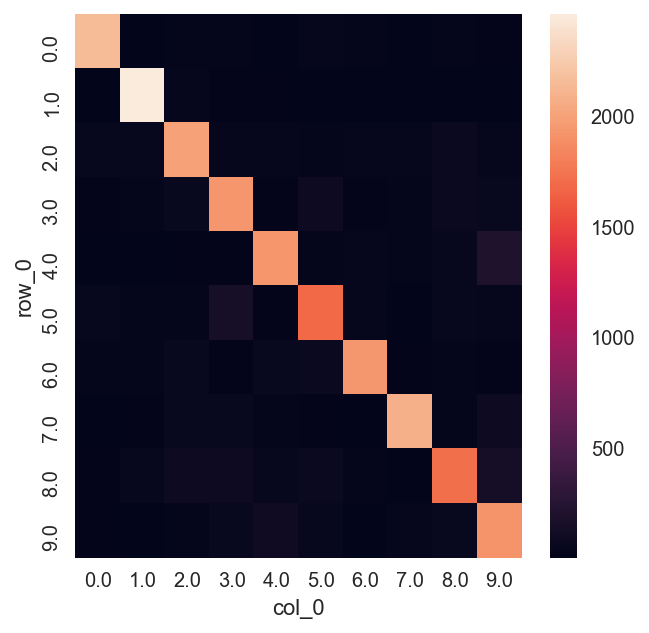

In [48]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
classes = ["0","1","2","3","4","5","6","7","8","9"]
df_confusion = pd.crosstab(y_test, y_pred) #margins=True)
print df_confusion
sns.heatmap(df_confusion)
print "total accuracy:", sklearn.metrics.accuracy_score(y_pred, y_test)

fig = plt.figure()
plt.bar(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.title("feature_importances")
plt.ylabel("% importance")
plt.xlabel("pixel")

col_0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0
row_0                                                            
0.0    2275     1     4     0     2     2    10     0    27     2
1.0       0  2527    12     5     3     4     5     7     6     1
2.0      16    10  2238    15    14     1    19    29    19     4
3.0       3     5    40  2124     7    35     3    34    22    28
4.0       5     2     4     0  2149     1    20     6    14   115
5.0      18    17     5    41     8  1936    26     5    16    16
6.0      12    14     5     0     9    27  2174     0     8     0
7.0       1    18    38     1    19     1     0  2204    13    77
8.0       4    26    11    33    13    25     9     4  2073    48
9.0      12     9     4    40    40     8     0    37    19  2101
total accuracy: 0.943766233766


Text(0.5,0,u'pixel')

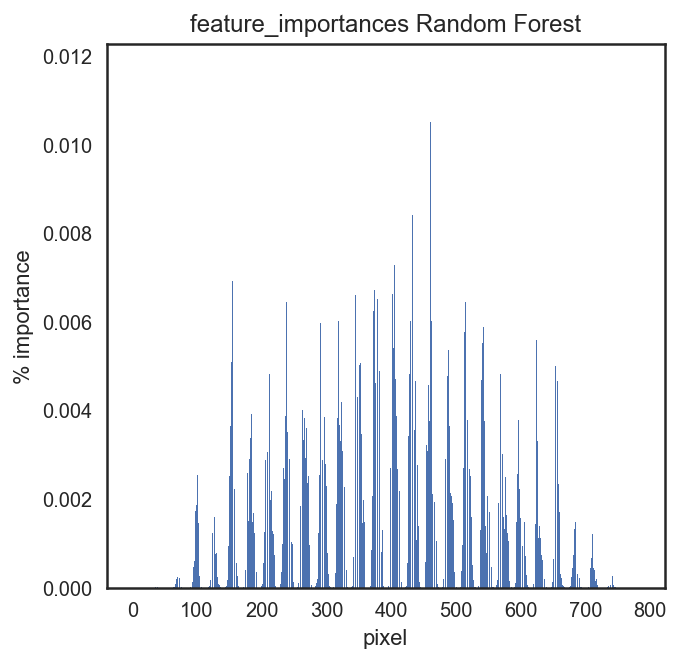

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100,max_depth = 10)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

from sklearn.metrics import classification_report
classes = ["0","1","2","3","4","5","6","7","8","9"]
df_confusion = pd.crosstab(y_test, y_pred) #margins=True)
print df_confusion
sns.heatmap(df_confusion)
print "total accuracy:", sklearn.metrics.accuracy_score(y_pred, y_test)

fig = plt.figure()
plt.bar(np.arange(len(clf.feature_importances_)), clf.feature_importances_)
plt.title("feature_importances Random Forest")
plt.ylabel("% importance")
plt.xlabel("pixel")

## Spooky Author Identification Kaggle Competition
The [competition](https://www.kaggle.com/c/spooky-author-identification) is over by now, but you are welcome to play with the data and see if you can get a high score.
A good place to start would be to review the public notebook [Benchmarking different Sklearn classifiers](https://www.kaggle.com/vonneumann/benchmarking-sklearn-classifiers).

## References
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://www.analyticsvidhya.com/blog/2016/04/complete-tutorial-tree-based-modeling-scratch-in-python/
- https://www.analyticsvidhya.com/blog/2014/06/introduction-random-forest-simplified/